In [1]:
# Importing numpy library and renaming it as np for convenient usage in our code
import numpy as np

# Importing pandas library and renaming it as pd for convenient usage in our code
import pandas as pd

# Importing tensorflow library and renaming it as tf for convenience
import tensorflow as tf

# Importing imdb dataset from tensorflow.keras.datasets
from tensorflow.keras.datasets import imdb

# Importing pad_sequences function from tensorflow.keras.preprocessing.sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Importing Sequential model from tensorflow.keras.models
from tensorflow.keras.models import Sequential

# Importing Embedding, LSTM, and Dense layers from tensorflow.keras.layers
from tensorflow.keras.layers import Embedding, LSTM, Dense


In [2]:
vocab_size = 10000

max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)


In [3]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# [Optional] you can convert the numeric codes back to words by using the following code

# Get the word index dictionary
word_index = imdb.get_word_index()

# Reverse the word index dictionary
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Convert the first review in X_train back to words
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])

print(decoded_review)


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

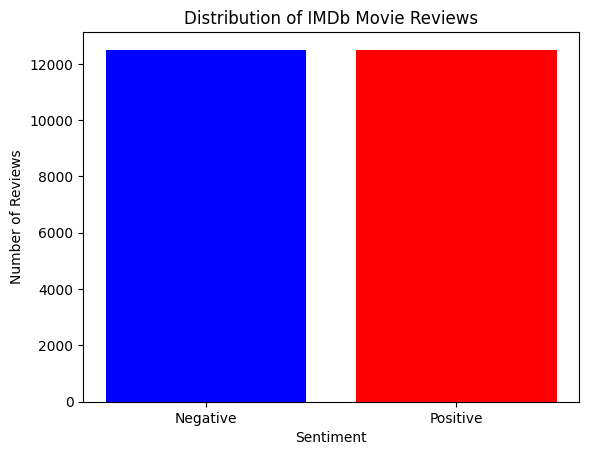

In [6]:
import matplotlib.pyplot as plt

# Count positive and negative reviews
unique, counts = np.unique(y_train, return_counts=True)
review_distribution = dict(zip(unique, counts))

# Visualize the distribution
plt.bar(review_distribution.keys(), review_distribution.values(), color=['blue', 'red'])
plt.title('Distribution of IMDb Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


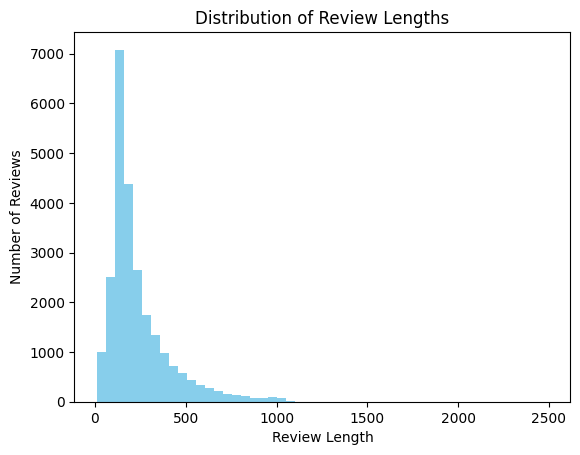

In [8]:
# Calculate review lengths
review_lengths = [len(review) for review in X_train]
# Visualize review lengths
plt.hist(review_lengths, bins=50, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()


In [9]:

X_train = pad_sequences(X_train, maxlen=max_len)

X_test = pad_sequences(X_test, maxlen=max_len)


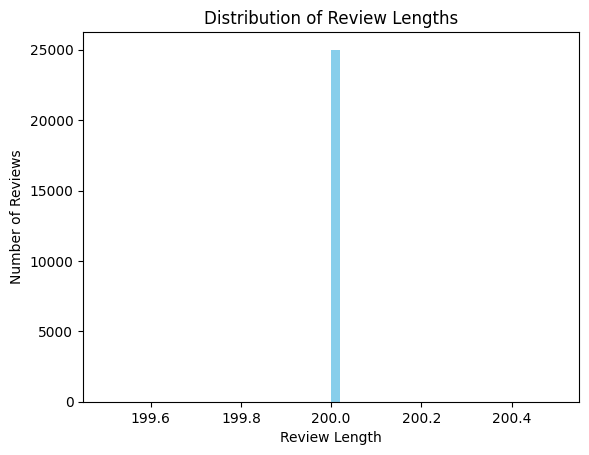

In [10]:
# Calculate review lengths
review_lengths = [len(review) for review in X_train]

# Visualize review lengths
plt.hist(review_lengths, bins=50, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()


In [11]:
embedding_dim = 128

model = Sequential(
[
Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
LSTM(units=64),
Dense(units=1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [13]:
#summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


Epoch 1/5


196/196 [==============================] - 200s 952ms/step - loss: 0.4350 - accuracy: 0.7960 - val_loss: 0.3347 - val_accuracy: 0.8576
Epoch 2/5
196/196 [==============================] - 151s 771ms/step - loss: 0.2392 - accuracy: 0.9085 - val_loss: 0.3673 - val_accuracy: 0.8588
Epoch 3/5
196/196 [==============================] - 150s 765ms/step - loss: 0.1754 - accuracy: 0.9363 - val_loss: 0.4276 - val_accuracy: 0.8558
Epoch 4/5
196/196 [==============================] - 169s 865ms/step - loss: 0.1369 - accuracy: 0.9504 - val_loss: 0.3889 - val_accuracy: 0.8596
Epoch 5/5
782/782 [==============================] - 82s 105ms/step - loss: 0.4024 - accuracy: 0.8589
Test Accuracy: 0.8588799834251404


In [14]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score, classification_report

# Predict probability scores for the test set
y_pred_probs = model.predict(X_test)

# Convert probability scores to binary labels
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate classification report
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


782/782 [==============================] - 84s 105ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     12500
           1       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

Confusion Matrix:
[[10756  1744]
 [ 1784 10716]]


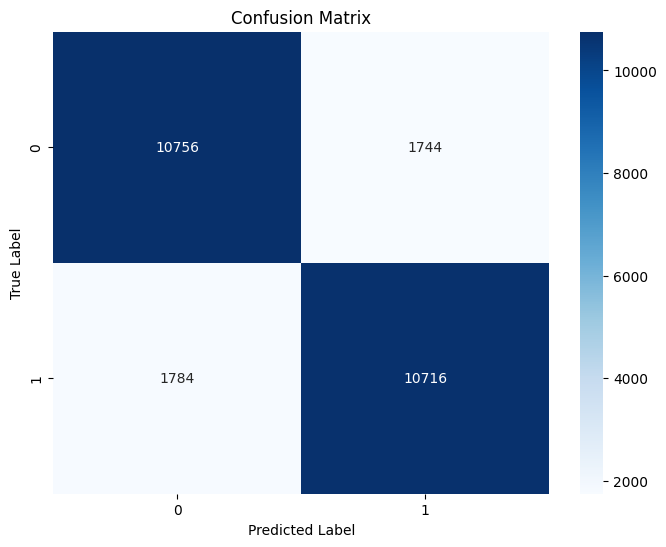

In [15]:
# Visualize confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
